# SUPPORT VECTOR MACHINE - CLASSIFIER

###### SVM works by mapping data to a high dimensional features space so that data points can be categorized, even when the data are not otherwise linearly seperable\

In [1]:
## import the liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('cell_samples.csv')
print(df.head())


        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  


In [8]:
df.shape

(699, 11)

In [10]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [11]:
df.size

7689

In [12]:
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

#### distributed of the classes

In [13]:
benign_df = df[df['Class'] == 2][0:200]
maligandt_df = df[df['Class'] == 4][0:200]

help(benign_df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data) -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |

<Axes: xlabel='Clump', ylabel='UnifSize'>

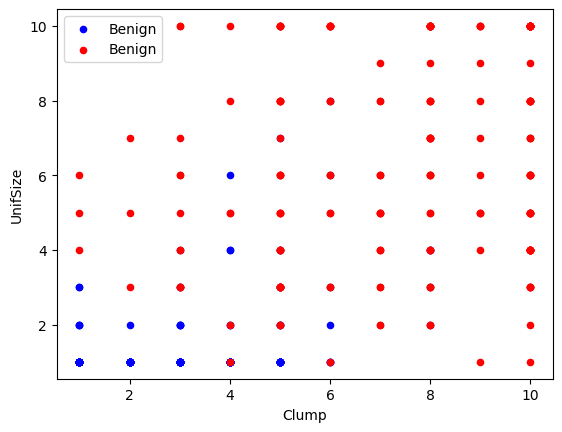

In [14]:
axes = benign_df.plot(kind='scatter', x = 'Clump', y= 'UnifSize',color= 'blue', label= 'Benign')

maligandt_df.plot(kind = 'scatter', x = 'Clump', y='UnifSize', color='red', label='Benign',ax= axes)


#### identifying unwanted rows


In [15]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [19]:
df = df[pd.to_numeric(df['BareNuc'], errors= 'coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

#### remove unwanted column

In [ ]:
df.columns

feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

#df 100 rows and 11 columns 
# picked 9 columns out of 11
x = np.asarray(feature_df)  # insependent array
y = np.asarray(df['Class'])


#### divide the data as train/ test dataset

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.2, random_state=28)


#### modelling

In [26]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', gamma= 'auto', C= 2)
classifier.fit(x_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [27]:
y_pred = classifier.predict(x_test)

#### evaluation

              precision    recall  f1-score   support

           2       0.94      0.99      0.96       349
           4       0.98      0.88      0.93       198

    accuracy                           0.95       547
   macro avg       0.96      0.94      0.95       547
weighted avg       0.95      0.95      0.95       547



Text(50.722222222222214, 0.5, 'True')

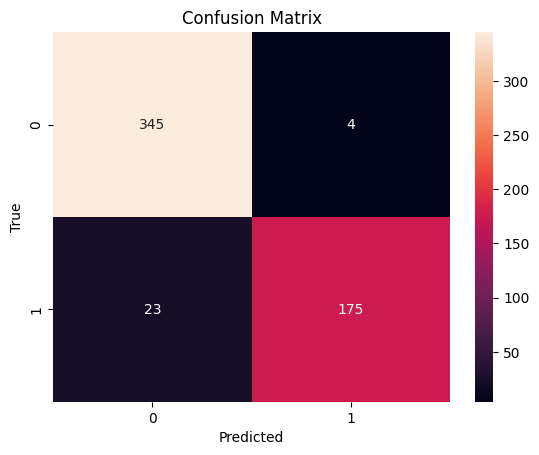

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))


matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot= True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')